<img src="header_escom26.jpg" alt="header" style="height:200px;">

# Práctica 4:  Programación dinámica: Multiplicación de una secuencia de matrices</br>
# Ibarra Soto Alejandro
# 2015080672

**Análisis de Algoritmos** </br>
**Profesor: Dr. Flavio Arturo Sánchez Garfias** </br>
**3CM2**

<h1>Método de divide y vencerás</h1>
El producto de un número n de matrices es optimizable en cuanto al número de multiplicaciones escalares requeridas. A la hora de multiplicar una serie de matrices se puede elegir en que orden queremos realizar las multiplicaciones entre estas. Se pueden realizar en un orden cualquiera dada la propiedad asociativa de la multiplicación.
<center><img src="i2.png"></center></br>
Decidamos el orden que decidamos el resultado siempre es el mismo. La diferencia esta en el número de multiplicaciones que implica elegir un orden u otro. Al multiplicar dos matrices M1 de tamaño nxm y M2 de tamaño mxk el número de multiplicaciones escalares es n*m*k. La cantidad total de multiplicaciones será, la suma de todas las multiplicaciones que hacen falta para multiplicar cada submatriz obtenida como resultado con la siguiente en el orden escogido. Y como vamos a ver en este sencillo ejemplo esta cantidad puede variar con el orden utilizado.
<center><img src="i1.png"></center></br>
Eligiendo un orden adecuado como podemos ver, optimizamos el coste de realizar las multiplicaciones escalares necesarias para llegar al resultado. Aquí se puede ver que el método <b>divide y vencerás</b> consiste en probar todas las posibles formas de multiplicar las matrices y escoger aquella que tiene el menor coste.</br>
<h2> Método de programación dinámica </h2>
Como vamos a emplear Programación Dinámica, buscamos que todas las subsoluciones sean óptimas, porque se debe de cumplir el principio de optimalidad de Bellman. Esto quiere decir que si la solución es buscar la forma de realizar la multiplicación de n matrices, una posible subsolución será multiplicar desde la matriz i hasta la j. El número mínimo de multiplicaciones necesarias para hallar la subsolución óptima de i a j será Mij. Si tenemos que ir calculando todas las subsoluciones hasta encontrar la M1n que es la que andamos buscando, necesitaremos una tabla de nxn donde iremos almacenando los resultados.
<center><img src="i3.png"></center></br>
Como la i y la j cumplen que 1 <= i <= j <= n solo vamos a utilizar la mitad superior derecha de la tabla en donde se cumple la restricción. En las Mij donde la i=j, se cumple que Mij=0. Tal y como hemos definido Mij es el número de multiplicaciones escalares necesarias para obtener el resultado de multiplicar desde la matriz i hasta la j, si i y j son iguales significa que no se realiza ninguna operación porque solo tenemos una matriz. La tabla empleada para realizar los cálculos tendría la forma que muestra la imagen.
Para hallar cada subsolución aplicamos la siguiente función que minimiza el coste total en número de multiplicaciones:
<center><img src="i4.png"></center></br>
El resultado del coste menor se encontrará en la casilla superior izquierda, y a partir de esta se usa la misma lógica para obtener el orden.

Import packages <a href="https://numpy.org">Numpy</a> and <a href="https://matplotlib.org">Matplotlib</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Definir la función para imprimir la solución**

In [2]:
def imprimir(mat,i,j,cad):
    #if((i-j==1) or (i-j==-1)):
    if((j-i)==1):
        cad.append("A")
        cad.append(str(int(i)))
    else:
        cad.append("(")
        imprimir(mat,int(i),int(mat[int(i),int(j),1]),cad)
        cad.append("x")
        imprimir(mat,int(mat[int(i),int(j),1]),int(j),cad)
        cad.append(")")

**Definir la función de divide y vencerás**

In [20]:
def min_mult_dyv(low,high,M,x):
    if M[low,high,0]!=-1:
        return M[low,high,0]
    if(high-low)==1:
        M[low,high,0]=0
        M[low,high,1]=0
        return M[low,high,0]
    if(high-low)==2:
        M[low,high,0]=x[low]*x[low+1]*x[low+2]
        M[low,high,1]=low+1
        return M[low,high,0]
    res=99999999999999999999999999999
    koptima=0
    for k in range (low+1,high):
        c1=min_mult_dyv(low,k,M,x)
        c2=min_mult_dyv(k,high,M,x)
        ct=c1+c2+x[low]*x[k]*x[high]
        if(ct<res):
            res=ct
            koptima=k
    M[low,high,0]=res
    M[low,high,1]=koptima
    return M[low,high,0]

def minMult_dyv(x):
    n=arr.shape[0]
    M=np.ones((n,n,2))*(-1)
    min_mult_dyv(0,n-1,M,x)
    #opt=["Resultado:"]
    #imprimir(M,0,n-1,opt)
    #cadena = " ".join(opt)
    #print(cadena)

**Definir la función de programación dinámica**

In [21]:
def min_mult(x):
    low=0
    high=(x.shape[0])-1
    M = np.ones((high+1,high+1,2))*-1            
    for i in range (low,high):
        k=0
        for j in range (i+1,high+1):
            if (j-k) == 1:
                M[k,j,0]=0
                M[k,j,1]=0
            else:
                if (j-k) == 2:
                    M[k,j,0]=x[k]*x[k+1]*x[k+2]
                    M[k,j,1]=k+1
                else:
                    res=-1
                    moptima=0
                    for m in range (k+1,j):
                        c1=M[k,m,0]
                        c2=M[m,j,0]
                        ct=c1+c2+x[k]*x[m]*x[j]
                        if res==-1:
                            res=ct
                            moptima=m
                        else:
                            if ct<res:
                                res=ct
                                moptima=m
                    M[k,j,0]=res
                    M[k,j,1]=moptima
            k=k+1
    #opt=["Resultado:"]
    #imprimir(M,0,high,opt)
    #cadena = " ".join(opt)
    #print(cadena)

# Pruebas 

A continuación, se crearán arreglos de 10, 100, 1000, 10000, 100000, 1000000 digitos

In [5]:
from time import time
timePD = [0] * (6)
timeDV = [0] * (6)

# Datos de tamaño 10

In [6]:
np.random.seed(101) #THE SEED
tam=10
arr = np.random.randint(0,100,tam)
arr

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40])

**Divide y vencerás**

In [7]:
start_time = time()
minMult_dyv(arr)
elapsed_time = time() - start_time
timeDV[0]=elapsed_time

Resultado: ( ( A 0 x ( A 1 x ( A 2 x ( A 3 x ( A 4 x ( A 5 x A 6 ) ) ) ) ) ) x ( A 7 x A 8 ) )


**Programación dinámica**

In [8]:
start_time = time()
min_mult(arr)
elapsed_time = time() - start_time
timePD[0]=elapsed_time

Resultado: ( ( A 0 x ( A 1 x ( A 2 x ( A 3 x ( A 4 x ( A 5 x A 6 ) ) ) ) ) ) x ( A 7 x A 8 ) )


# Datos de tamaño 100

In [9]:
np.random.seed(101) #THE SEED
tam=100
arr = np.random.randint(0,100,tam)
arr

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40,  4, 63, 40, 60, 92, 64,  5,
       12, 93, 40, 49, 83,  8, 29, 59, 34, 44, 72, 19, 10, 76, 95, 87,  0,
       73,  8, 62, 36, 83, 99, 28, 63,  7, 10, 52, 56, 38, 73, 52, 18, 71,
       15, 44,  0, 12, 17, 75, 79, 97, 93, 24, 36, 63, 19, 35, 30, 10, 60,
       20, 27,  8, 86, 26, 87, 46, 47, 54, 86,  9, 45,  2, 18, 58, 92, 11,
       10, 94, 35, 28,  3, 83, 84, 47, 14, 69, 60, 69, 51,  6, 88])

**Divide y vencerás**

In [10]:
start_time = time()
minMult_dyv(arr)
elapsed_time = time() - start_time
timeDV[1]=elapsed_time

Resultado: ( ( A 0 x ( A 1 x ( A 2 x ( A 3 x ( A 4 x ( A 5 x ( A 6 x ( A 7 x ( A 8 x ( A 9 x ( A 10 x ( A 11 x ( A 12 x ( A 13 x ( A 14 x ( A 15 x ( A 16 x ( A 17 x ( A 18 x ( A 19 x ( A 20 x ( A 21 x ( A 22 x ( A 23 x ( A 24 x ( A 25 x ( A 26 x ( A 27 x ( A 28 x ( A 29 x ( A 30 x ( A 31 x A 32 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( A 33 x ( ( A 34 x ( A 35 x ( A 36 x ( A 37 x ( A 38 x ( A 39 x ( A 40 x ( A 41 x ( A 42 x ( A 43 x ( A 44 x ( A 45 x ( A 46 x ( A 47 x ( A 48 x ( A 49 x ( A 50 x ( A 51 x A 52 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( A 53 x A 54 ) x A 55 ) x A 56 ) x A 57 ) x A 58 ) x A 59 ) x A 60 ) x A 61 ) x A 62 ) x A 63 ) x A 64 ) x A 65 ) x A 66 ) x A 67 ) x A 68 ) x A 69 ) x A 70 ) x A 71 ) x A 72 ) x A 73 ) x A 74 ) x A 75 ) x A 76 ) x A 77 ) x A 78 ) x A 79 ) x A 80 ) x A 81 ) x A 82 ) x A 83 ) x A 84 ) x A 85 ) x A 86 ) x A 87 ) x A 88 ) x A 89 ) x A

**Programación dinámica**

In [11]:
start_time = time()
min_mult(arr)
elapsed_time = time() - start_time
timePD[1]=elapsed_time

Resultado: ( ( A 0 x ( A 1 x ( A 2 x ( A 3 x ( A 4 x ( A 5 x ( A 6 x ( A 7 x ( A 8 x ( A 9 x ( A 10 x ( A 11 x ( A 12 x ( A 13 x ( A 14 x ( A 15 x ( A 16 x ( A 17 x ( A 18 x ( A 19 x ( A 20 x ( A 21 x ( A 22 x ( A 23 x ( A 24 x ( A 25 x ( A 26 x ( A 27 x ( A 28 x ( A 29 x ( A 30 x ( A 31 x A 32 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( A 33 x ( ( A 34 x ( A 35 x ( A 36 x ( A 37 x ( A 38 x ( A 39 x ( A 40 x ( A 41 x ( A 42 x ( A 43 x ( A 44 x ( A 45 x ( A 46 x ( A 47 x ( A 48 x ( A 49 x ( A 50 x ( A 51 x A 52 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( A 53 x A 54 ) x A 55 ) x A 56 ) x A 57 ) x A 58 ) x A 59 ) x A 60 ) x A 61 ) x A 62 ) x A 63 ) x A 64 ) x A 65 ) x A 66 ) x A 67 ) x A 68 ) x A 69 ) x A 70 ) x A 71 ) x A 72 ) x A 73 ) x A 74 ) x A 75 ) x A 76 ) x A 77 ) x A 78 ) x A 79 ) x A 80 ) x A 81 ) x A 82 ) x A 83 ) x A 84 ) x A 85 ) x A 86 ) x A 87 ) x A 88 ) x A 89 ) x A

# Datos de tamaño 1000

In [12]:
np.random.seed(101) #THE SEED
tam=1000
arr = np.random.randint(0,100,tam)
arr

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40,  4, 63, 40, 60, 92, 64,  5,
       12, 93, 40, 49, 83,  8, 29, 59, 34, 44, 72, 19, 10, 76, 95, 87,  0,
       73,  8, 62, 36, 83, 99, 28, 63,  7, 10, 52, 56, 38, 73, 52, 18, 71,
       15, 44,  0, 12, 17, 75, 79, 97, 93, 24, 36, 63, 19, 35, 30, 10, 60,
       20, 27,  8, 86, 26, 87, 46, 47, 54, 86,  9, 45,  2, 18, 58, 92, 11,
       10, 94, 35, 28,  3, 83, 84, 47, 14, 69, 60, 69, 51,  6, 88, 71, 68,
       23, 35, 79, 98, 67, 82, 57, 77, 46,  3, 46, 29, 86, 21, 21, 81, 23,
       94, 71, 20, 27, 75,  5, 49, 86, 89, 63, 82, 77,  3, 56, 14, 49, 87,
       52, 13, 47, 49, 24, 20, 64, 52, 60, 47, 29, 60, 53, 11, 40, 91, 45,
       97, 24, 36, 38,  9, 52, 67, 43,  1, 79, 68, 68, 61, 18, 51, 14, 28,
       17, 87, 46, 52, 16, 70, 71, 84, 10, 62, 96, 57, 23, 86, 85, 26, 76,
       66, 54, 17, 65, 57, 89,  2, 80, 50, 66, 88, 79, 93,  6, 92, 42, 22,
       20, 25, 97, 54, 71, 72, 80, 93, 64, 63, 80, 38, 45, 35, 25, 95, 75,
       72, 11, 76, 79, 50

**Divide y vencerás**

In [15]:
start_time = time()
minMult_dyv(arr)
elapsed_time = time() - start_time
timeDV[2]=elapsed_time

Resultado: ( ( A 0 x ( A 1 x ( A 2 x ( A 3 x ( A 4 x ( A 5 x ( A 6 x ( A 7 x ( A 8 x ( A 9 x ( A 10 x ( A 11 x ( A 12 x ( A 13 x ( A 14 x ( A 15 x ( A 16 x ( A 17 x ( A 18 x ( A 19 x ( A 20 x ( A 21 x ( A 22 x ( A 23 x ( A 24 x ( A 25 x ( A 26 x ( A 27 x ( A 28 x ( A 29 x ( A 30 x ( A 31 x A 32 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( A 33 x ( ( A 34 x ( A 35 x ( A 36 x ( A 37 x ( A 38 x ( A 39 x ( A 40 x ( A 41 x ( A 42 x ( A 43 x ( A 44 x ( A 45 x ( A 46 x ( A 47 x ( A 48 x ( A 49 x ( A 50 x ( A 51 x A 52 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( A 53 x ( ( A 54 x ( A 55 x ( A 56 x ( A 57 x ( A 58 x ( A 59 x ( A 60 x ( A 61 x ( A 62 x ( A 63 x ( A 64 x ( A 65 x ( A 66 x ( A 67 x ( A 68 x ( A 69 x ( A 70 x ( A 71 x ( A 72 x ( A 73 x ( A 74 x ( A 75 x ( A 76 x ( A 77 x ( A 78 x ( A 79 x ( A 80 x ( A 81 x ( A 82 x ( A 83 x ( A 84 x ( A 85 x ( A 86 x ( A 87 x ( A 88 x ( A 89 x ( A 90 x ( A 91 x ( A 92 x ( A 93 x ( A 94 x ( A 95 x ( A 96 x ( A 97 x ( A 98 x ( A 99

**Programación dinámica**

In [16]:
start_time = time()
min_mult(arr)
elapsed_time = time() - start_time
timePD[2]=elapsed_time

Resultado: ( ( A 0 x ( A 1 x ( A 2 x ( A 3 x ( A 4 x ( A 5 x ( A 6 x ( A 7 x ( A 8 x ( A 9 x ( A 10 x ( A 11 x ( A 12 x ( A 13 x ( A 14 x ( A 15 x ( A 16 x ( A 17 x ( A 18 x ( A 19 x ( A 20 x ( A 21 x ( A 22 x ( A 23 x ( A 24 x ( A 25 x ( A 26 x ( A 27 x ( A 28 x ( A 29 x ( A 30 x ( A 31 x A 32 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( A 33 x ( ( A 34 x ( A 35 x ( A 36 x ( A 37 x ( A 38 x ( A 39 x ( A 40 x ( A 41 x ( A 42 x ( A 43 x ( A 44 x ( A 45 x ( A 46 x ( A 47 x ( A 48 x ( A 49 x ( A 50 x ( A 51 x A 52 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) x ( A 53 x ( ( A 54 x ( A 55 x ( A 56 x ( A 57 x ( A 58 x ( A 59 x ( A 60 x ( A 61 x ( A 62 x ( A 63 x ( A 64 x ( A 65 x ( A 66 x ( A 67 x ( A 68 x ( A 69 x ( A 70 x ( A 71 x ( A 72 x ( A 73 x ( A 74 x ( A 75 x ( A 76 x ( A 77 x ( A 78 x ( A 79 x ( A 80 x ( A 81 x ( A 82 x ( A 83 x ( A 84 x ( A 85 x ( A 86 x ( A 87 x ( A 88 x ( A 89 x ( A 90 x ( A 91 x ( A 92 x ( A 93 x ( A 94 x ( A 95 x ( A 96 x ( A 97 x ( A 98 x ( A 99

# Datos de tamaño 10000

In [26]:
np.random.seed(101) #THE SEED
tam=10000
arr = np.random.randint(0,100,tam)
arr

array([95, 11, 81, ..., 57,  2, 76])

**Divide y vencerás**

In [ ]:
start_time = time()
minMult_dyv(arr)
elapsed_time = time() - start_time
timeDV[3]=elapsed_time

**Programación dinámica**

In [ ]:
start_time = time()
min_mult(arr)
elapsed_time = time() - start_time
timePD[3]=elapsed_time

# Datos de tamaño 100000

In [ ]:
np.random.seed(101) #THE SEED
tam=100000
arr = np.random.randint(0,100,tam)
arr

**Divide y vencerás**

In [ ]:
start_time = time()
minMult_dyv(arr)
elapsed_time = time() - start_time
timeDV[4]=elapsed_time

**Programación dinámica**

In [ ]:
start_time = time()
min_mult(arr)
elapsed_time = time() - start_time
timePD[4]=elapsed_time

# Datos de tamaño 1000000

In [ ]:
np.random.seed(101) #THE SEED
tam=1000000
arr = np.random.randint(0,100,tam)
arr

**Divide y vencerás**

In [ ]:
start_time = time()
minMult_dyv(arr)
elapsed_time = time() - start_time
timeDV[5]=elapsed_time

**Programación dinámica**

In [ ]:
start_time = time()
min_mult(arr)
elapsed_time = time() - start_time
timePD[5]=elapsed_time

# Gráficas
**La gráfica con los diferentes tiempos se encuentra a continuación**

**NOTA: Ninguno de los dos métodos terminaba para 10000 datos, por lo que ambos se detuvieron y unicamente se mostraron los valores obtenidos**

In [ ]:
timeDV[3]=18000
timeDV[4]=36000

In [38]:
print("Método:\t\t10 datos\t100 datos\t1000 datos\t10000 datos\t\t100000 datos\t\t1000000 datos\nPD\t\t%.10f"
      %timePD[0],"\t%.10f"%timePD[1], "\t%.10f"%timePD[2], "\t%.10f"%timePD[3], "\t\t%.10f" %timePD[4],
      "\t\t%.10f" %timePD[5], "\nDV\t\t%.10f"%timeDV[0],"\t%.10f" %timeDV[1], "\t%.10f" %timeDV[2], "\t%.10f" %timeDV[3], "\t\t%.10f" 
      %timeDV[4], "\t\t%.10f" %timeDV[5])

Método:		10 datos	100 datos	1000 datos	10000 datos		100000 datos		1000000 datos
PD		0.0009984970 	0.1681764126 	155.2136206627 	0.0000000000 		0.0000000000 		0.0000000000 
DV		0.0000000000 	0.3207352161 	258.0361177921 	0.0000000000 		0.0000000000 		0.0000000000


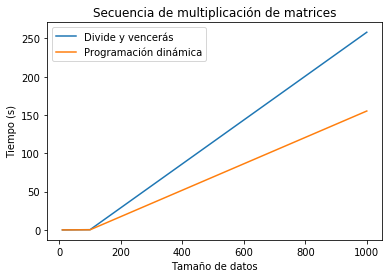

In [44]:
n=[10,100,1000]
plt.plot(n,timeDV[:3],label="Divide y vencerás")
plt.plot(n,timePD[:3],label="Programación dinámica")

plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo (s)')

plt.title("Secuencia de multiplicación de matrices")

plt.legend()

plt.show()

# Conclusiones

Gracias al desarrollo de esta práctica se logró identificar la importancia que tiene una técnica de programación llamada Programación Dinámica, la cul ayuda a agilizar la ejecución de los algoritmos, pero no puede ser perfecta, ya que hace uso de una gran cantidad de memoria, por lo que se encuentra limitada por los recursos que la computadora donde se ejecuten los programas tenga, y al implementarlo en el problema del orden de la ejecución de matrices se puede notar que efectivamente ofrece resultados más rápidos que aquellos otorgados por el método divide y vencerás, es importnte destacar que las matrices ocupadas para almacenar los datos son bastante grandes, por ello, aquellos datos cuyas dimensiones son bastante grandes no se lograron ejecutar.

Es así, que se puede observar que en la programación dinámica siempre hay que tener presente que se ocupará una gran cantidad de memoria, y que se tiene que hacer un análisis adecuado considerando que información es la requerida de almacenar para poder hacer todo de manera más ágil, ya que la matriz ocupada para obtener el costo minimo de la multiplicacion de matrices requería de un llendo particular en el que se iban recorriendo en diagonal y se iba almacenando la suma de dos casillas anterior más el costo de la matriz generada, es por ello, que es importante identificar la forma en la que se relacionan los datos guardados en la matriz y saber que será rápido pero ocupará demasiada memoria.